In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import shap
import lime.lime_tabular


In [2]:
# Load the dataset containing crime data
crime_data_path = "/Users/arkamandol/DataspellProjects/Desertation_arka_23023023/data_files/UK_Police_Street_Crime_2018-10-01_to_2021_09_31.csv"
crime_df = pd.read_csv(crime_data_path)

# Convert 'Month' to datetime and filter for 2021 and specific crime type
crime_df['Month'] = pd.to_datetime(crime_df['Month'])
filtered_crime_df = crime_df[(crime_df['Month'].dt.year == 2021) &
                             (crime_df['Crime type'] == "Violence and sexual offences")]

# Modify 'LSOA name' to remove the last 5 characters
filtered_crime_df['LSOA name'] = filtered_crime_df['LSOA name'].str[:-5]

# Rename 'LSOA name' to 'lower_tier_local_authorities'
filtered_crime_df.rename(columns={'LSOA name': 'lower_tier_local_authorities'}, inplace=True)

# Aggregate the data by 'Month' and 'lower_tier_local_authorities' and count occurrences
aggregated_crime_data = filtered_crime_df.groupby(['Month', 'lower_tier_local_authorities']).size().reset_index(name='crime_count')


/var/folders/nt/vmygtqvs10vb28qdjwspykv00000gn/T/ipykernel_47960/571909358.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crime_df['LSOA name'] = filtered_crime_df['LSOA name'].str[:-5]
/var/folders/nt/vmygtqvs10vb28qdjwspykv00000gn/T/ipykernel_47960/571909358.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crime_df.rename(columns={'LSOA name': 'lower_tier_local_authorities'}, inplace=True)


In [3]:
# Load your datasets
ethnic_data = pd.read_csv("/Users/arkamandol/DataspellProjects/Desertation_arka_23023023/data_files/Ethnic_Group_Data_Transformed.csv")
economy_status_data = pd.read_csv("/Users/arkamandol/DataspellProjects/Desertation_arka_23023023/data_files/Economy_Status_Data_Transformed.csv")
employment_history_data = pd.read_csv("/Users/arkamandol/DataspellProjects/Desertation_arka_23023023/data_files/Employment_History_Data_Transformed.csv")
education_level_data = pd.read_csv("/Users/arkamandol/DataspellProjects/Desertation_arka_23023023/data_files/Education_Level_Data_Transformed.csv")
migrant_data = pd.read_csv("/Users/arkamandol/DataspellProjects/Desertation_arka_23023023/data_files/Migrant_Data_Transformed.csv")

# Rename the locality code columns to 'area_code'
ethnic_data.rename(columns={'ethnic_lower_tier_local_authorities_code': 'area_code'}, inplace=True)
economy_status_data.rename(columns={'economy_lower_tier_local_authorities_code': 'area_code'}, inplace=True)
employment_history_data.rename(columns={'employment_lower_tier_local_authorities_code': 'area_code'}, inplace=True)
education_level_data.rename(columns={'education_lower_tier_local_authorities_code': 'area_code'}, inplace=True)
migrant_data.rename(columns={'migrant_lower_tier_local_authorities_code': 'area_code'}, inplace=True)

# Merge all datasets on the 'area_code' column
merged_data = ethnic_data.merge(economy_status_data, on='area_code', how='outer')
merged_data = merged_data.merge(employment_history_data, on='area_code', how='outer')
merged_data = merged_data.merge(education_level_data, on='area_code', how='outer')
merged_data = merged_data.merge(migrant_data, on='area_code', how='outer')

# Save the merged dataset to a CSV file (optional)
# merged_data.to_csv('path_to/merged_dataset.csv', index=False)
merged_data

,area_code,ethnic_lower_tier_local_authorities,ethnic_asian_asian_british_or_asian_welsh_bangladeshi,ethnic_asian_asian_british_or_asian_welsh_chinese,ethnic_asian_asian_british_or_asian_welsh_indian,ethnic_asian_asian_british_or_asian_welsh_other_asian,ethnic_asian_asian_british_or_asian_welsh_pakistani,ethnic_black_black_british_black_welsh_caribbean_or_african_african,ethnic_black_black_british_black_welsh_caribbean_or_african_caribbean,ethnic_black_black_british_black_welsh_caribbean_or_african_other_black,...,education_level_3_qualifications_2_or_more_a_levels_or_vces_4_or_more_as_levels_higher_school_certificate_progression_or_advanced_diploma_welsh_baccalaureate_advance_diploma_nvq_level_3;_advanced_gnvq_city_and_guilds_advanced_craft_onc_ond_btec_national_rsa_advanced_diploma,education_level_4_qualifications_or_above_degree_ba_bsc_higher_degree_ma_phd_pgce_nvq_level_4_to_5_hnc_hnd_rsa_higher_diploma_btec_higher_level_professional_qualifications_for_example_teaching_nursing_accountancy,education_no_qualifications,education_other_apprenticeships_vocational_or_work-related_qualifications_other_qualifications_achieved_in_england_or_wales_qualifications_achieved_outside_england_or_wales_equivalent_not_stated_or_unknown,migrant_lower_tier_local_authorities,migrant_address_one_year_ago_is_student_term-time_or_boarding_school_address_in_the_uk,migrant_address_one_year_ago_is_the_same_as_the_address_of_enumeration,migrant_does_not_apply,migrant_migrant_from_outside_the_uk_address_one_year_ago_was_outside_the_uk,migrant_migrant_from_within_the_uk_address_one_year_ago_was_in_the_uk
0,E06000001,Hartlepool,278,217,335,473,297,327,57,61,...,13776,18526,17286,7059,Hartlepool,181,83133,918,271,7834
1,E06000002,Middlesbrough,595,669,2804,2032,8990,3339,162,315,...,19976,30127,27282,10063,Middlesbrough,755,126756,1621,2244,12548
2,E06000003,Redcar and Cleveland,158,208,175,336,283,182,48,35,...,21300,28003,24732,11661,Redcar and Cleveland,148,125080,1176,331,9796
3,E06000004,Stockton-on-Tees,236,690,1812,1439,4875,1823,130,250,...,29004,46648,29441,14588,Stockton-on-Tees,286,177449,1916,853,16088
4,E06000005,Darlington,759,308,1086,618,195,456,135,110,...,16141,25517,16972,8468,Darlington,177,96392,1040,518,9672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,W06000020,Torfaen,99,212,254,546,91,118,69,41,...,12736,20128,16631,6463,Torfaen,107,84981,915,158,6115
327,W06000021,Monmouthshire,52,277,317,445,94,132,62,36,...,12172,30809,12315,5891,Monmouthshire,226,84351,735,397,7248
328,W06000022,Newport,2858,711,2023,1799,4803,2687,553,497,...,19978,39544,27690,10282,Newport,345,144997,1839,1061,11350
329,W06000023,Powys,79,160,176,782,50,74,96,51,...,19125,35849,21316,9805,Powys,285,120584,1052,472,10779


In [4]:
# Load the additional dataset
# file_path = '/Users/arkamandol/DataspellProjects/Desertation_arka_23023023/data_files/Merged_Dataset.csv'
# additional_df = pd.read_csv(file_path)
additional_df = merged_data.copy()
# Identify and drop redundant 'lower_tier_local_authorities' columns
columns_to_drop = [col for col in additional_df.columns if 'lower_tier_local_authorities' in col]
columns_to_drop.remove('ethnic_lower_tier_local_authorities')  # Keep one relevant column

# Drop the identified columns
df_cleaned = additional_df.drop(columns=columns_to_drop)

# Rename the relevant column to 'lower_tier_local_authorities'
df_cleaned.rename(columns={'ethnic_lower_tier_local_authorities': 'lower_tier_local_authorities'}, inplace=True)
# Merge the crime data with the cleaned dataset on 'lower_tier_local_authorities'
merged_data = aggregated_crime_data.merge(df_cleaned, on='lower_tier_local_authorities', how='inner')

# Display basic information and initial rows of the merged dataset
print(merged_data.head())
print(merged_data.info())


       Month lower_tier_local_authorities  crime_count  area_code  \
0 2021-01-01                         Adur           95  E07000223   
1 2021-01-01                    Allerdale          212  E07000026   
2 2021-01-01                 Amber Valley          250  E07000032   
3 2021-01-01                         Arun          316  E07000224   
4 2021-01-01                     Ashfield          272  E07000170   

   ethnic_asian_asian_british_or_asian_welsh_bangladeshi  \
0                                                369       
1                                                 43       
2                                                 37       
3                                                523       
4                                                 56       

   ethnic_asian_asian_british_or_asian_welsh_chinese  \
0                                                269   
1                                                139   
2                                                282   


In [5]:
# Create a copy for processing
data = merged_data.copy()

# Drop columns not needed for analysis
data.drop(columns=['lower_tier_local_authorities', 'area_code'], inplace=True)

# Mapping new column names for easier reference
new_column_names = {
    'ethnic_asian_asian_british_or_asian_welsh_bangladeshi': 'Ethnic_Asian_Bangladeshi',
    'ethnic_asian_asian_british_or_asian_welsh_chinese': 'Ethnic_Asian_Chinese',
    'ethnic_asian_asian_british_or_asian_welsh_indian': 'Ethnic_Asian_Indian',
    'ethnic_asian_asian_british_or_asian_welsh_other_asian': 'Ethnic_Asian_Other',
    'ethnic_asian_asian_british_or_asian_welsh_pakistani': 'Ethnic_Asian_Pakistani',
    'ethnic_black_black_british_black_welsh_caribbean_or_african_african': 'Ethnic_Black_African',
    'ethnic_black_black_british_black_welsh_caribbean_or_african_caribbean': 'Ethnic_Black_Caribbean',
    'ethnic_black_black_british_black_welsh_caribbean_or_african_other_black': 'Ethnic_Black_Other',
    'ethnic_mixed_or_multiple_ethnic_groups_other_mixed_or_multiple_ethnic_groups': 'Ethnic_Mixed_Other',
    'ethnic_mixed_or_multiple_ethnic_groups_white_and_asian': 'Ethnic_Mixed_White_Asian',
    'ethnic_mixed_or_multiple_ethnic_groups_white_and_black_african': 'Ethnic_Mixed_White_Black_African',
    'ethnic_mixed_or_multiple_ethnic_groups_white_and_black_caribbean': 'Ethnic_Mixed_White_Black_Caribbean',
    'ethnic_other_ethnic_group_any_other_ethnic_group': 'Ethnic_Other',
    'ethnic_other_ethnic_group_arab': 'Ethnic_Arab',
    'ethnic_white_english_welsh_scottish_northern_irish_or_british': 'Ethnic_White_British',
    'ethnic_white_gypsy_or_irish_traveller': 'Ethnic_White_Gypsy_Traveller',
    'ethnic_white_irish': 'Ethnic_White_Irish',
    'ethnic_white_other_white': 'Ethnic_White_Other',
    'ethnic_white_roma': 'Ethnic_White_Roma',
    'economy_employed': 'Economy_Employed',
    'economy_not_employed': 'Economy_Not_Employed',
    'employment_not_in_employment_never_worked': 'Employment_Never_Worked',
    'employment_not_in_employment_not_worked_in_the_last_12_months': 'Employment_Not_Worked_12M',
    'employment_not_in_employment_worked_in_the_last_12_months': 'Employment_Worked_12M',
    'education_level_1_and_entry_level_qualifications_1_to_4_gcses_grade_a*_to_c_any_gcses_at_other_grades_o_levels_or_cses_any_grades_1_as_level_nvq_level_1_foundation_gnvq_basic_or_essential_skills': 'Education_Level_1',
    'education_level_2_qualifications_5_or_more_gcses_a*_to_c_or_9_to_4_o_levels_passes_cses_grade_1_school_certification_1_a_level_2_to_3_as_levels_vces_intermediate_or_higher_diploma_welsh_baccalaureate_intermediate_diploma_nvq_level_2_intermediate_gnvq_city_and_guilds_craft_btec_first_or_general_diploma_rsa_diploma': 'Education_Level_2',
    'education_level_3_qualifications_2_or_more_a_levels_or_vces_4_or_more_as_levels_higher_school_certificate_progression_or_advanced_diploma_welsh_baccalaureate_advance_diploma_nvq_level_3;_advanced_gnvq_city_and_guilds_advanced_craft_onc_ond_btec_national_rsa_advanced_diploma': 'Education_Level_3',
    'education_level_4_qualifications_or_above_degree_ba_bsc_higher_degree_ma_phd_pgce_nvq_level_4_to_5_hnc_hnd_rsa_higher_diploma_btec_higher_level_professional_qualifications_for_example_teaching_nursing_accountancy': 'Education_Level_4+',
    'education_no_qualifications': 'Education_No_Qualifications',
    'education_other_apprenticeships_vocational_or_work-related_qualifications_other_qualifications_achieved_in_england_or_wales_qualifications_achieved_outside_england_or_wales_equivalent_not_stated_or_unknown': 'Education_Other_Qualifications',
    'migrant_address_one_year_ago_is_student_term-time_or_boarding_school_address_in_the_uk': 'Migrant_Student_UK',
    'migrant_address_one_year_ago_is_the_same_as_the_address_of_enumeration': 'Migrant_Same_Address',
    'migrant_does_not_apply': 'Migrant_NA',
    'migrant_migrant_from_outside_the_uk_address_one_year_ago_was_outside_the_uk': 'Migrant_Outside_UK',
    'migrant_migrant_from_within_the_uk_address_one_year_ago_was_in_the_uk': 'Migrant_Within_UK'
}

# Rename columns according to the mapping
data.rename(columns=new_column_names, inplace=True)




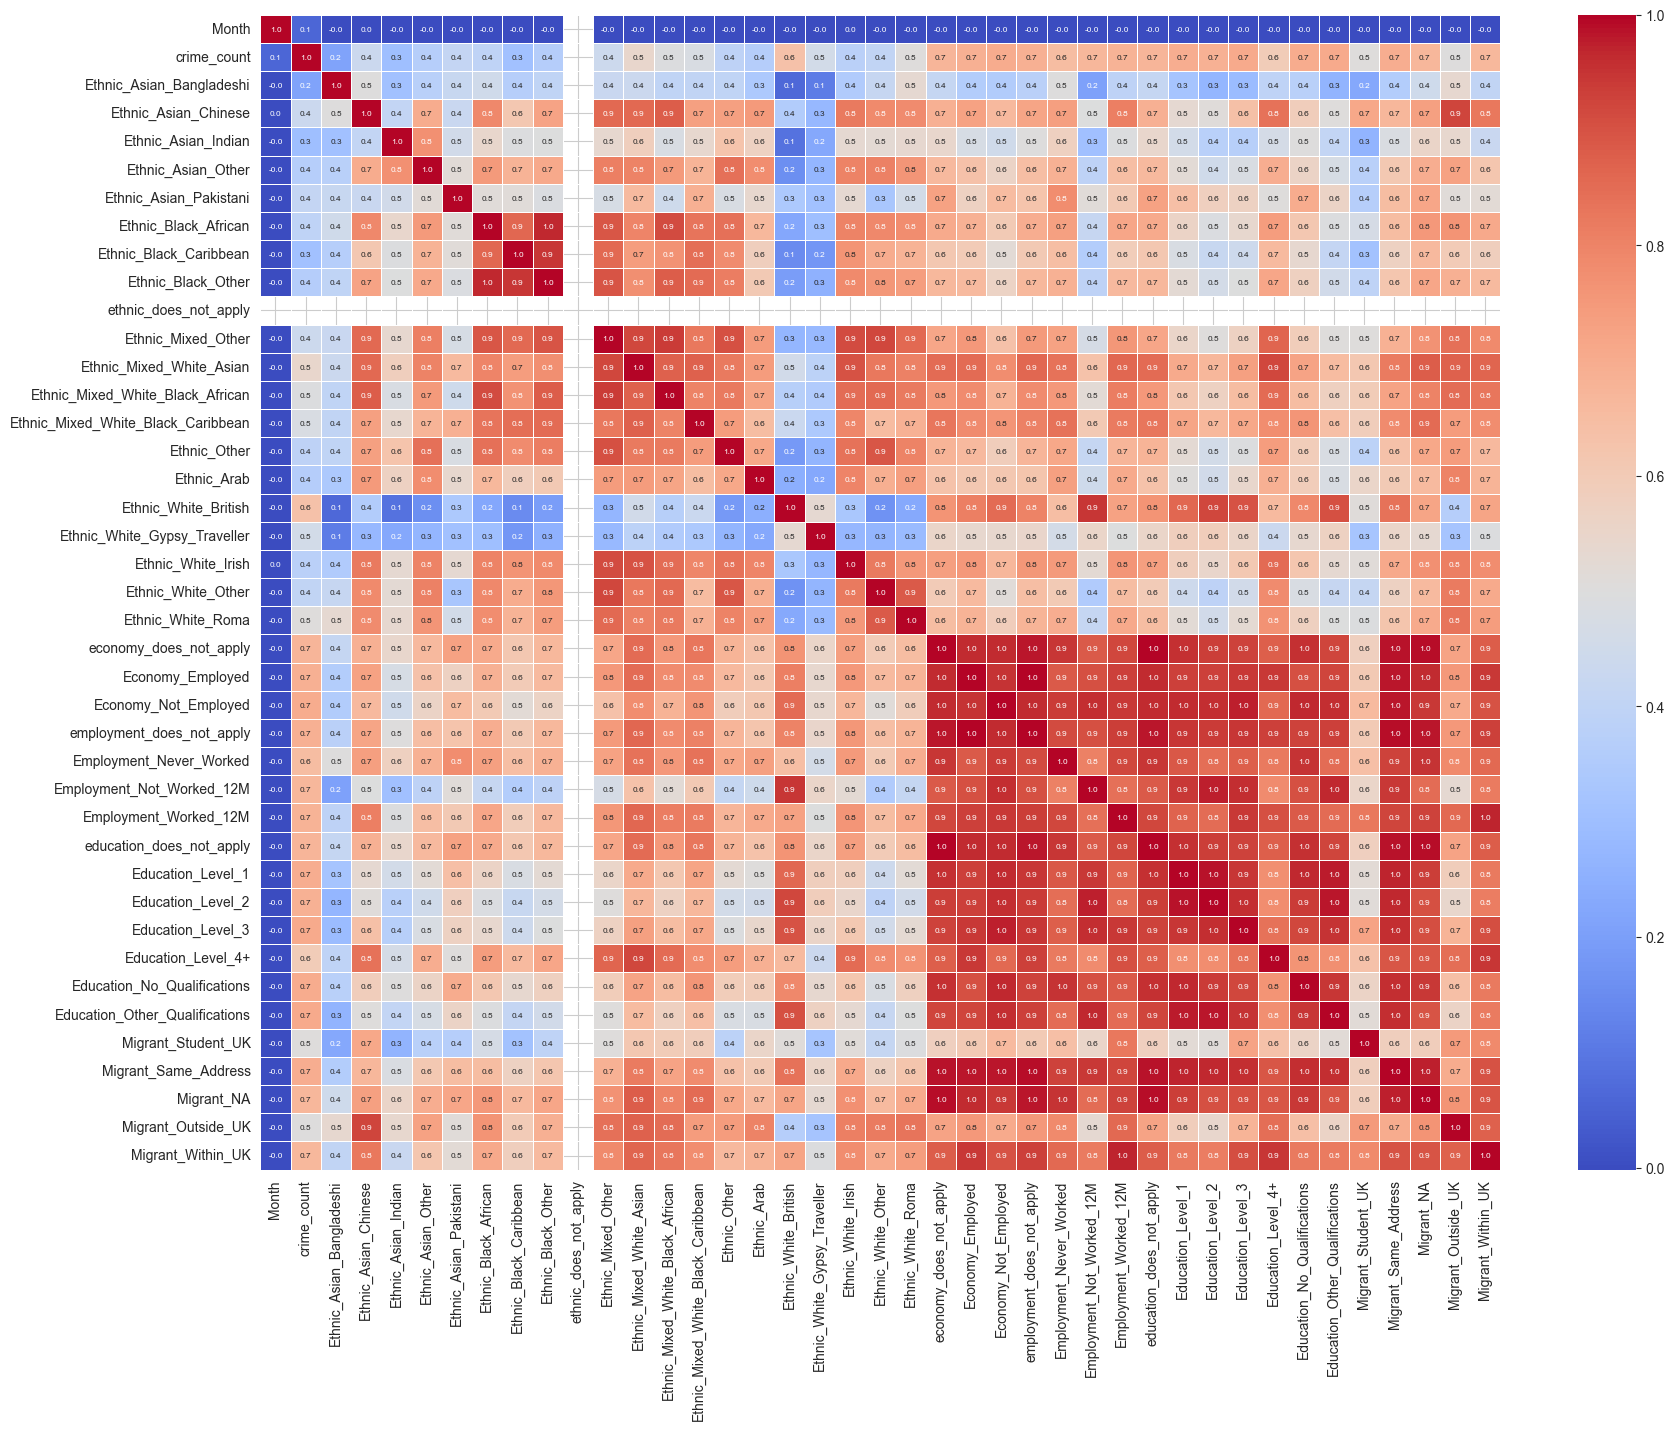

In [6]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the size of the plot
plt.figure(figsize=(20, 15))  # Increase the figure size for better readability

# Create the heatmap with annotations
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".1f", annot_kws={'size': 6}, cmap='coolwarm', linewidths=.5)

# Rotate the x and y labels for better readability
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.yticks(rotation=0)   # y-axis labels can be left horizontal or adjusted as needed

# Show the plot
plt.show()

In [7]:
# # Select columns for further analysis
# prefixes = ['Migrant', 'Education', 'Economy', 'Ethnic', 'Employment']
# selected_columns = []
# 
# for prefix in prefixes:
#     prefix_columns = [col for col in data.columns if col.startswith(prefix)]
#     corr_with_target = data[prefix_columns].corrwith(data['crime_count']).abs()
#     best_column = corr_with_target.idxmax()
#     selected_columns.append(best_column)
# 
# # No need to reload the data, proceed with the selected columns
# selected_columns_with_month = ['Month'] + selected_columns + ['crime_count']
# final_data = data[selected_columns_with_month]
# 
# # Scale features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(final_data.drop(columns=['Month', 'crime_count']))
# scaled_features_df = pd.DataFrame(scaled_features, columns=selected_columns)
# 
# # # Combine scaled features with 'Month' and 'crime_count'
# # final_data = pd.concat([final_data[['Month']], scaled_features_df, final_data['crime_count']], axis=1)
# # 
# # # Convert 'Month' to a numerical format (Unix timestamp)
# # final_data['Month'] = pd.to_datetime(final_data['Month']).astype(int) // 10**9
# 
# # Extract year and month from the 'Month' column and treat them as categorical
# # Extract month from the 'Month' column and treat it as categorical
# final_data['Month'] = pd.to_datetime(final_data['Month']).dt.month.astype('category')
# 
# # Combine scaled features with 'Month' and 'crime_count'
# final_data = pd.concat([final_data[['Month']], scaled_features_df, final_data['crime_count']], axis=1)
# final_data

In [8]:
# Display the first few rows and the general information of the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Month                               2876 non-null   datetime64[ns]
 1   crime_count                         2876 non-null   int64         
 2   Ethnic_Asian_Bangladeshi            2876 non-null   int64         
 3   Ethnic_Asian_Chinese                2876 non-null   int64         
 4   Ethnic_Asian_Indian                 2876 non-null   int64         
 5   Ethnic_Asian_Other                  2876 non-null   int64         
 6   Ethnic_Asian_Pakistani              2876 non-null   int64         
 7   Ethnic_Black_African                2876 non-null   int64         
 8   Ethnic_Black_Caribbean              2876 non-null   int64         
 9   Ethnic_Black_Other                  2876 non-null   int64         
 10  ethnic_does_not_apply   

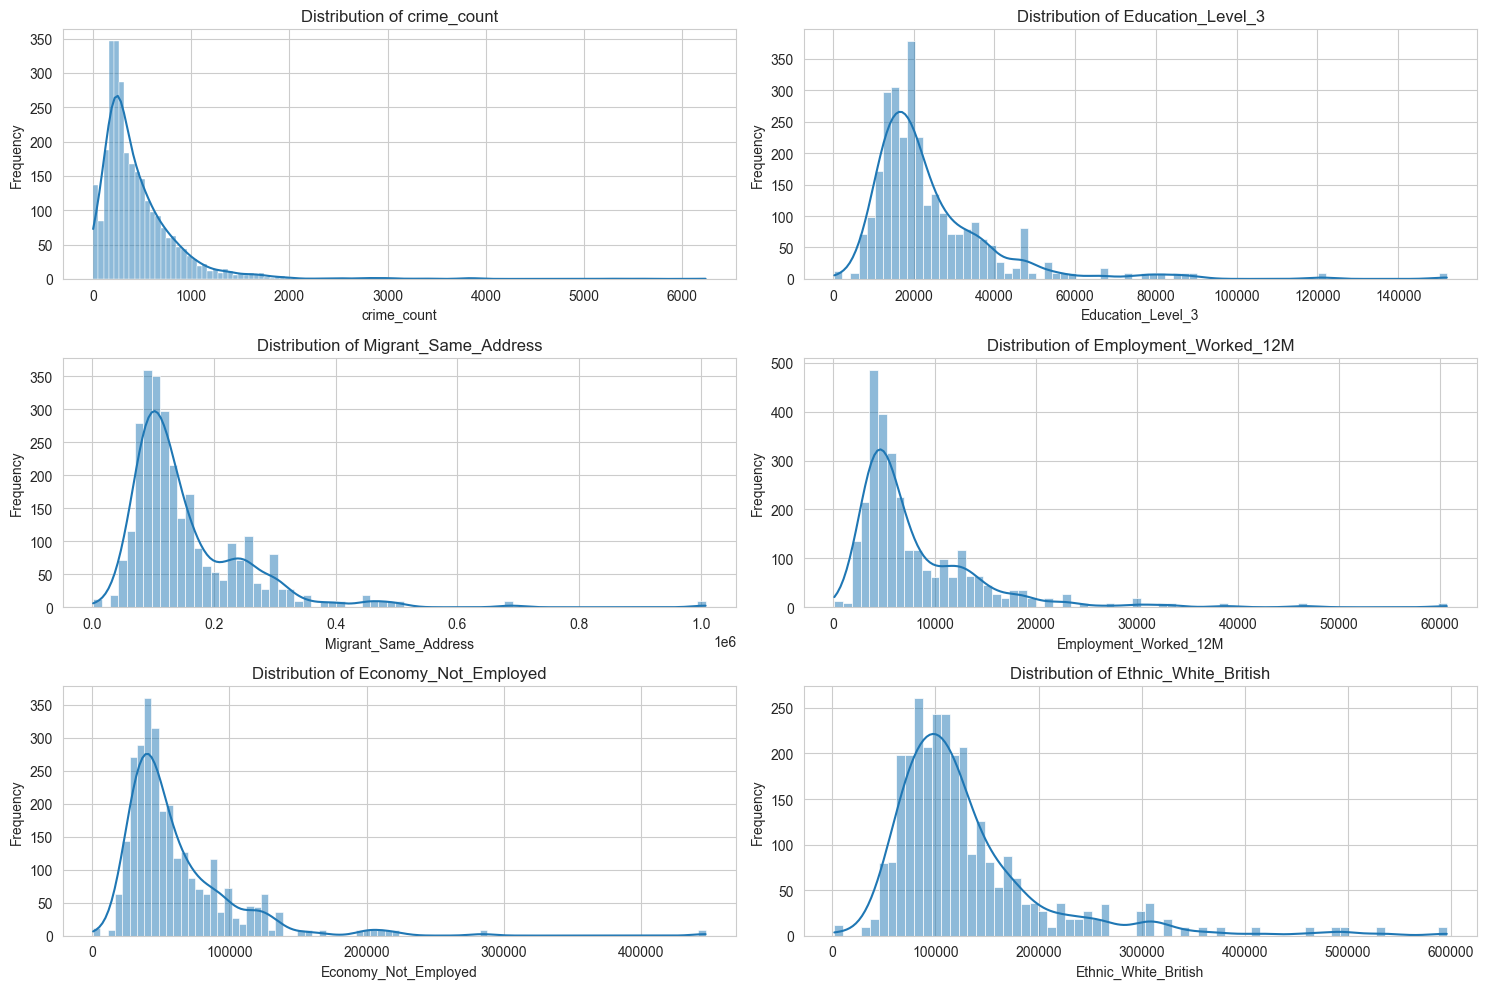

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of key variables
variables = ['crime_count', 'Education_Level_3', 'Migrant_Same_Address',
             'Employment_Worked_12M', 'Economy_Not_Employed', 'Ethnic_White_British']

# Plotting the distributions
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


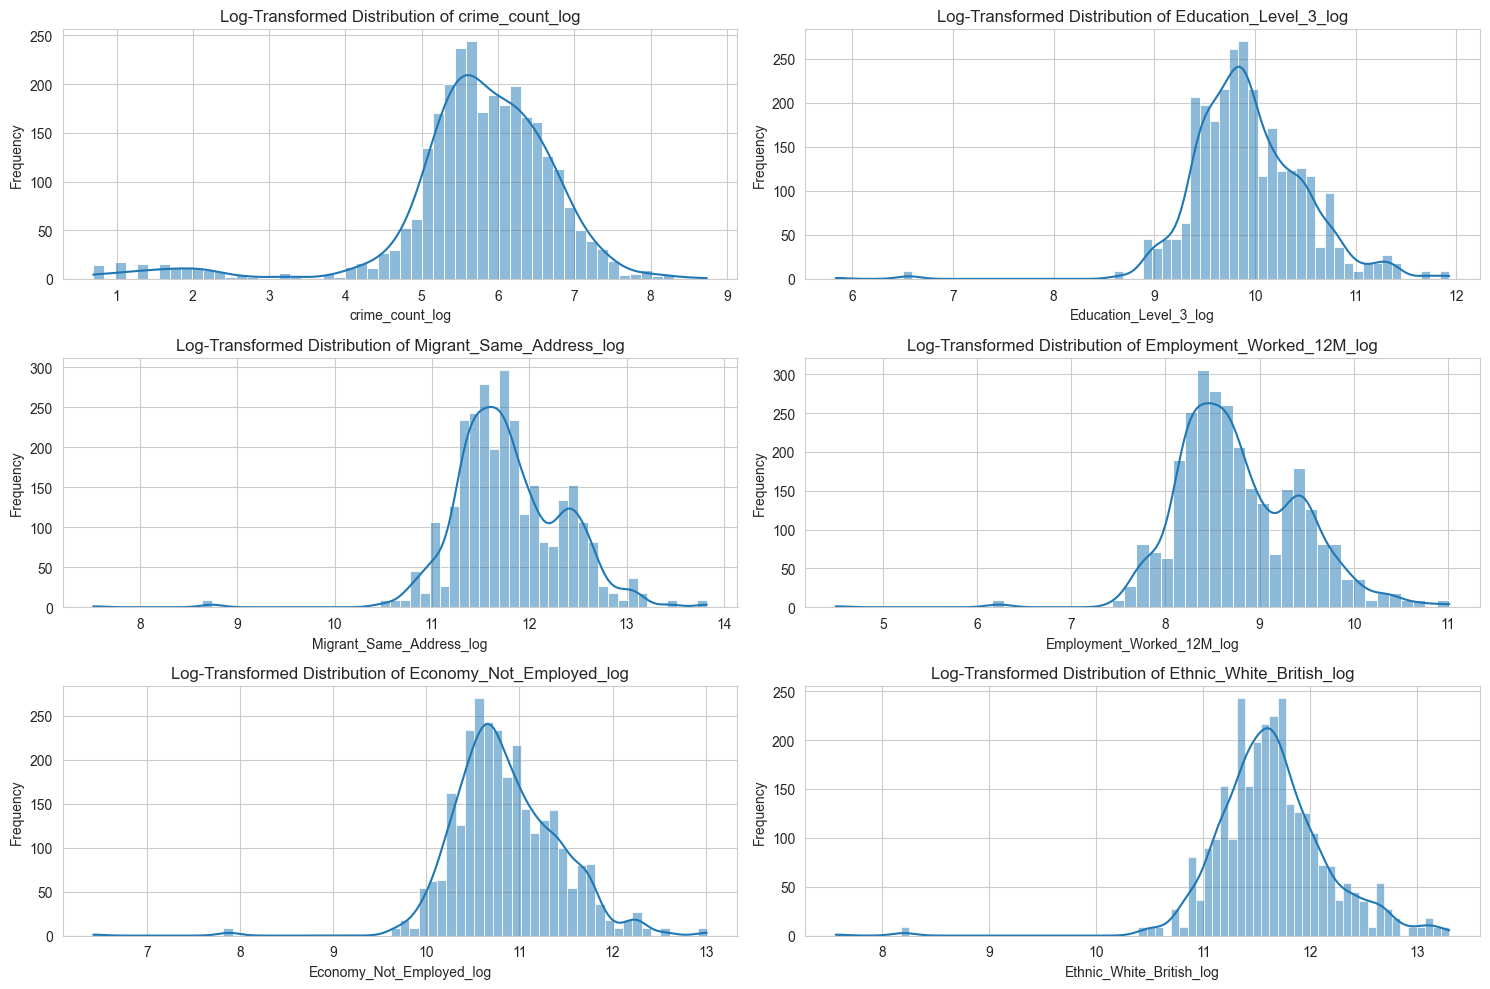

In [10]:
import numpy as np

# Applying logarithmic transformation, adding 1 to avoid log(0) issue
log_transformed_data = data.copy()
log_transformed_data['crime_count_log'] = np.log1p(log_transformed_data['crime_count'])
log_transformed_data['Education_Level_3_log'] = np.log1p(log_transformed_data['Education_Level_3'])
log_transformed_data['Migrant_Same_Address_log'] = np.log1p(log_transformed_data['Migrant_Same_Address'])
log_transformed_data['Employment_Worked_12M_log'] = np.log1p(log_transformed_data['Employment_Worked_12M'])
log_transformed_data['Economy_Not_Employed_log'] = np.log1p(log_transformed_data['Economy_Not_Employed'])
log_transformed_data['Ethnic_White_British_log'] = np.log1p(log_transformed_data['Ethnic_White_British'])

# Plotting the log-transformed distributions
plt.figure(figsize=(15, 10))
for i, var in enumerate(['crime_count_log', 'Education_Level_3_log', 'Migrant_Same_Address_log',
                         'Employment_Worked_12M_log', 'Economy_Not_Employed_log', 'Ethnic_White_British_log'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(log_transformed_data[var], kde=True)
    plt.title(f'Log-Transformed Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [11]:
# Applying quantile binning on log-transformed variables
log_binned_data = log_transformed_data.copy()

# Defining the number of bins (e.g., 3 bins for low, medium, high)
n_bins = 3

# Applying quantile binning
log_binned_data['crime_count_binned'] = pd.qcut(log_binned_data['crime_count_log'], q=n_bins, labels=['Low', 'Medium', 'High'])
log_binned_data['Education_Level_3_binned'] = pd.qcut(log_binned_data['Education_Level_3_log'], q=n_bins, labels=['Low', 'Medium', 'High'])
log_binned_data['Migrant_Same_Address_binned'] = pd.qcut(log_binned_data['Migrant_Same_Address_log'], q=n_bins, labels=['Low', 'Medium', 'High'])
log_binned_data['Employment_Worked_12M_binned'] = pd.qcut(log_binned_data['Employment_Worked_12M_log'], q=n_bins, labels=['Low', 'Medium', 'High'])
log_binned_data['Economy_Not_Employed_binned'] = pd.qcut(log_binned_data['Economy_Not_Employed_log'], q=n_bins, labels=['Low', 'Medium', 'High'])
log_binned_data['Ethnic_White_British_binned'] = pd.qcut(log_binned_data['Ethnic_White_British_log'], q=n_bins, labels=['Low', 'Medium', 'High'])

# Display the first few rows of the binned data
print(log_binned_data[['crime_count_binned', 'Education_Level_3_binned', 'Migrant_Same_Address_binned',
                       'Employment_Worked_12M_binned', 'Economy_Not_Employed_binned', 'Ethnic_White_British_binned']].head())


  crime_count_binned Education_Level_3_binned Migrant_Same_Address_binned  \
0                Low                      Low                         Low   
1                Low                      Low                         Low   
2             Medium                   Medium                      Medium   
3             Medium                   Medium                      Medium   
4             Medium                   Medium                      Medium   

  Employment_Worked_12M_binned Economy_Not_Employed_binned  \
0                          Low                         Low   
1                          Low                         Low   
2                          Low                      Medium   
3                       Medium                        High   
4                          Low                      Medium   

  Ethnic_White_British_binned  
0                         Low  
1                      Medium  
2                      Medium  
3                        High  
4   

In [12]:
# Convert 'Month' to a datetime object if it isn't already
log_binned_data['Month'] = pd.to_datetime(log_binned_data['Month'])

# Extract the month part and encode it as a categorical variable
log_binned_data['Month_Encoded'] = log_binned_data['Month'].dt.month.astype('category')

# Display the first few rows to verify the changes
print(log_binned_data[['Month', 'Month_Encoded']].head())


       Month Month_Encoded
0 2021-01-01             1
1 2021-01-01             1
2 2021-01-01             1
3 2021-01-01             1
4 2021-01-01             1


In [13]:
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import K2Score


# Selecting the relevant binned and encoded variables for the Bayesian network
bayesian_data = log_binned_data[['Month_Encoded', 'crime_count_binned', 'Education_Level_3_binned',
                                 'Migrant_Same_Address_binned', 'Employment_Worked_12M_binned',
                                 'Economy_Not_Employed_binned', 'Ethnic_White_British_binned']]

# Encoding categorical variables (Month_Encoded is already categorical)
for col in bayesian_data.columns:
    if bayesian_data[col].dtype.name == 'category':
        bayesian_data[col] = bayesian_data[col].cat.codes

# Performing structure learning using Hill-Climb Search and BIC scoring
hc = HillClimbSearch(bayesian_data)
best_model = hc.estimate(scoring_method=K2Score(bayesian_data))

# Display the structure of the learned Bayesian network
print(best_model.edges())


/var/folders/nt/vmygtqvs10vb28qdjwspykv00000gn/T/ipykernel_47960/1196227319.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayesian_data[col] = bayesian_data[col].cat.codes


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Month_Encoded', 'crime_count_binned'), ('Education_Level_3_binned', 'Ethnic_White_British_binned'), ('Education_Level_3_binned', 'Employment_Worked_12M_binned'), ('Education_Level_3_binned', 'crime_count_binned'), ('Migrant_Same_Address_binned', 'Education_Level_3_binned'), ('Migrant_Same_Address_binned', 'Employment_Worked_12M_binned'), ('Migrant_Same_Address_binned', 'crime_count_binned'), ('Migrant_Same_Address_binned', 'Ethnic_White_British_binned'), ('Employment_Worked_12M_binned', 'Ethnic_White_British_binned'), ('Employment_Worked_12M_binned', 'crime_count_binned'), ('Economy_Not_Employed_binned', 'Migrant_Same_Address_binned'), ('Economy_Not_Employed_binned', 'Employment_Worked_12M_binned'), ('Economy_Not_Employed_binned', 'crime_count_binned'), ('Economy_Not_Employed_binned', 'Education_Level_3_binned'), ('Economy_Not_Employed_binned', 'Ethnic_White_British_binned'), ('Ethnic_White_British_binned', 'crime_count_binned')]


In [14]:
# Fit the Bayesian network
model = BayesianNetwork(best_model.edges())
model.fit(bayesian_data, estimator=BayesianEstimator)


In [15]:
# Evaluate the model using BIC score
bic_score = BicScore(bayesian_data).score(model)
print(f"BIC Score: {bic_score}")


BIC Score: -34167.234212962096


In [16]:
from pgmpy.estimators import K2Score

# Evaluate the model using K2 score
k2_score = K2Score(bayesian_data).score(best_model)
print(f"K2 Score: {k2_score}")


K2 Score: -15536.538264599694


In [17]:
from pgmpy.inference import VariableElimination

# Perform inference to determine the most probable causes of high crime_count_binned
inference = VariableElimination(model)
crime_cause = inference.map_query(variables=['crime_count_binned'])
print(f"Most likely cause of crime: {crime_cause}")


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Most likely cause of crime: {'crime_count_binned': 0}


In [18]:
# Ensure 'crime_count_binned' is a categorical type
bayesian_data['crime_count_binned'] = bayesian_data['crime_count_binned'].astype('category')

# Now, you can access the categories
print(bayesian_data['crime_count_binned'].cat.categories)
# Print the categories and their corresponding labels
print(bayesian_data['crime_count_binned'].cat.categories)
# Assuming the model and inference have been set up as before
crime_cause = inference.map_query(variables=['crime_count_binned'])
print(f"Most likely cause of crime: {crime_cause}")


Index([0, 1, 2], dtype='int8')
Index([0, 1, 2], dtype='int8')


/var/folders/nt/vmygtqvs10vb28qdjwspykv00000gn/T/ipykernel_47960/4247723632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayesian_data['crime_count_binned'] = bayesian_data['crime_count_binned'].astype('category')


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Most likely cause of crime: {'crime_count_binned': 0}


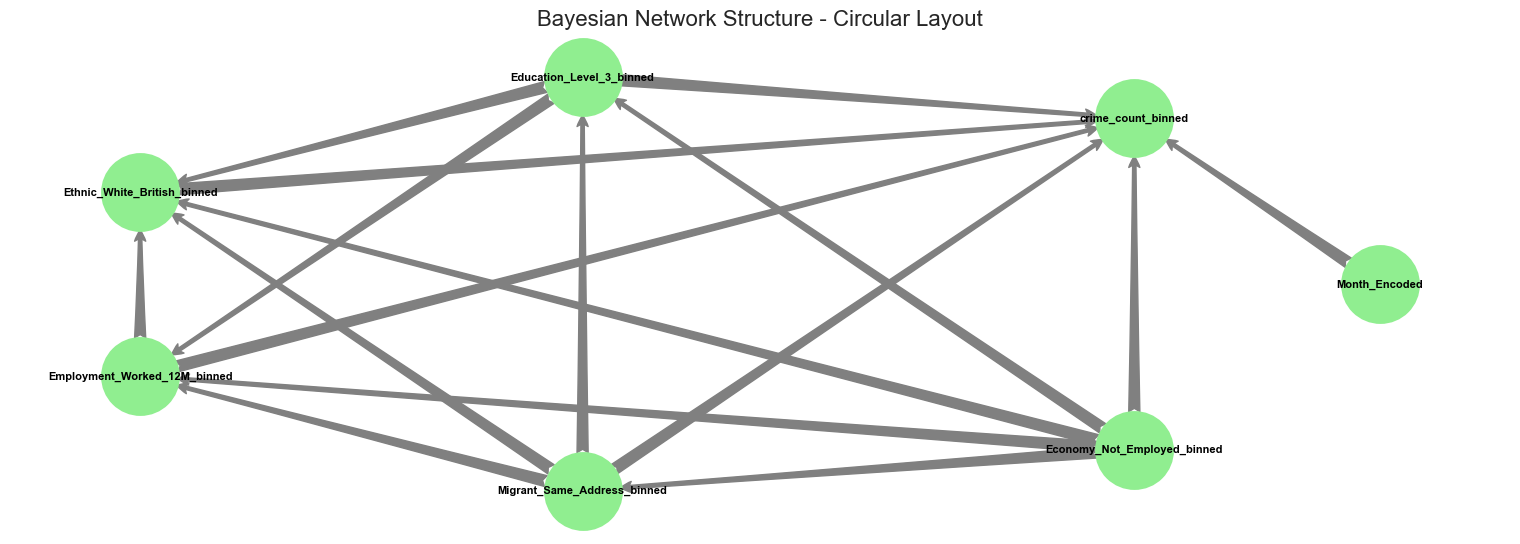

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'model' is your Bayesian network model
# Extracting the structure of the Bayesian Network
edges = model.edges()

# Create a directed graph from the Bayesian network structure
G = nx.DiGraph()
G.add_edges_from(edges)

# Set node positions using a circular layout for better organization
pos = nx.circular_layout(G)  # Circular layout for a more organized appearance

# Draw the network
plt.figure(figsize=(15, 5))  # Increase the figure size for a more spacious view
nx.draw(
    G, pos,
    with_labels=True,
    node_size=3000,  # Even larger nodes
    node_color='lightgreen',  # Softer, calming color for nodes
    font_size=8,  # Slightly larger font for labels
    font_weight='bold',
    edge_color='gray',  # Softer edge color
    linewidths=2,  # Thicker node borders for emphasis
    arrowsize=20,  # Larger arrows for better visibility
    arrowstyle='fancy',  # Different arrow style for a unique look
)

plt.title("Bayesian Network Structure - Circular Layout", fontsize=16)  # Larger title font size
plt.show()


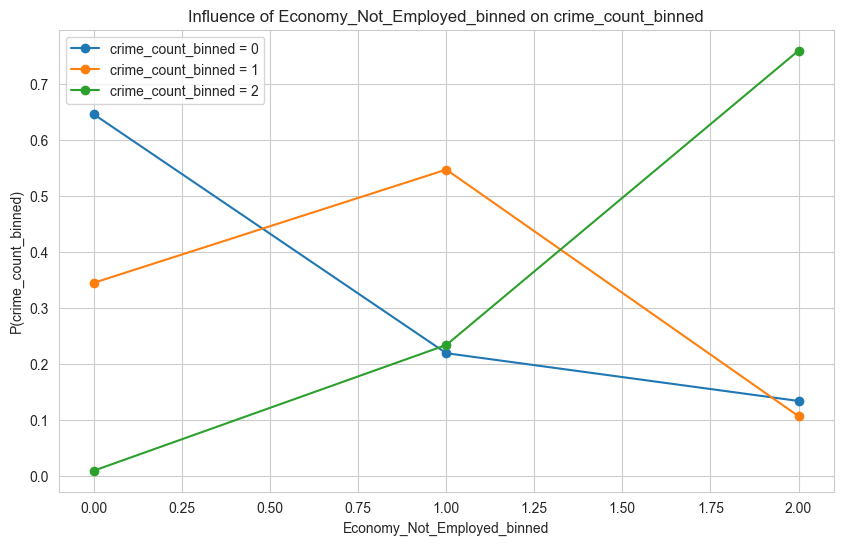

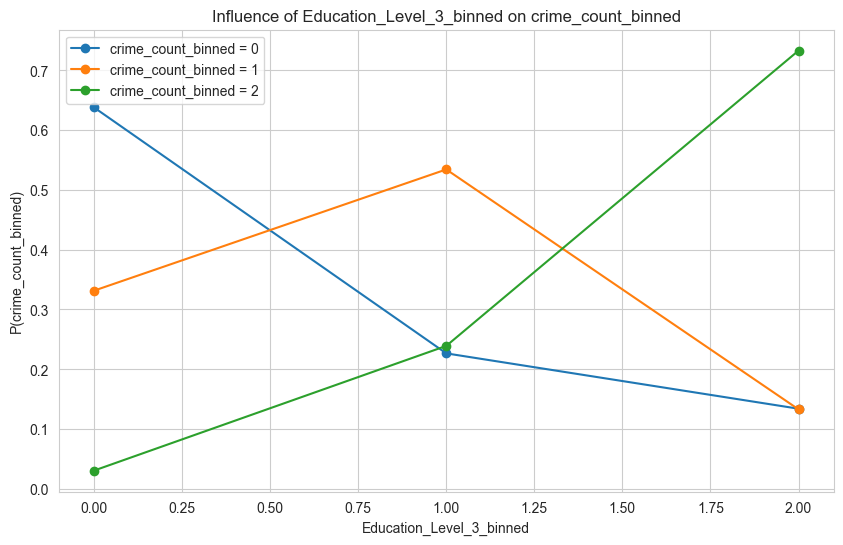

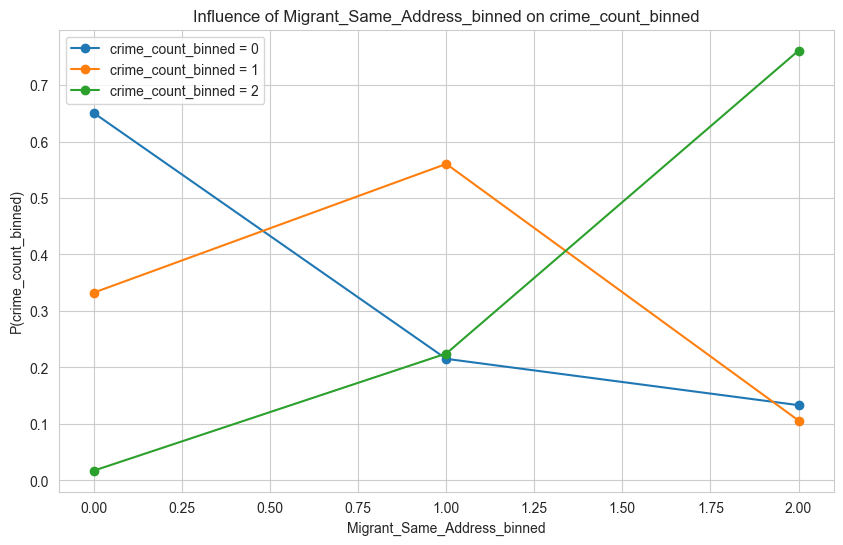

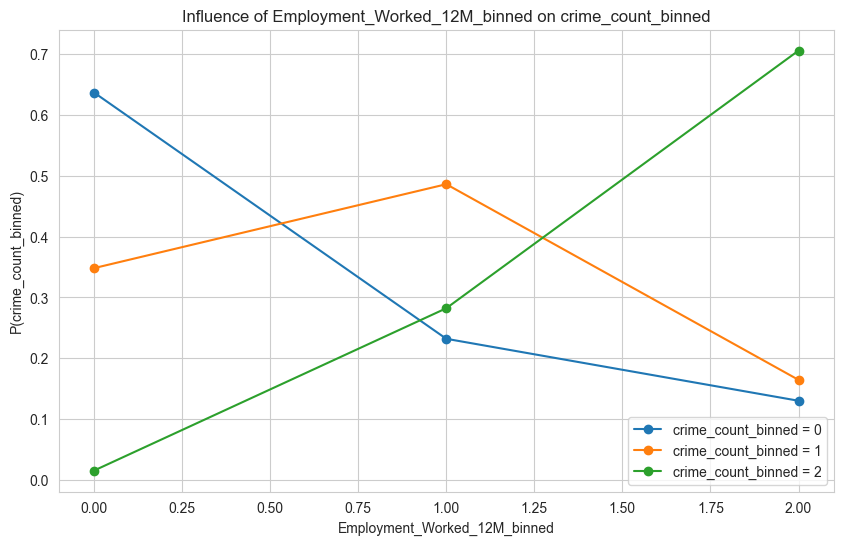

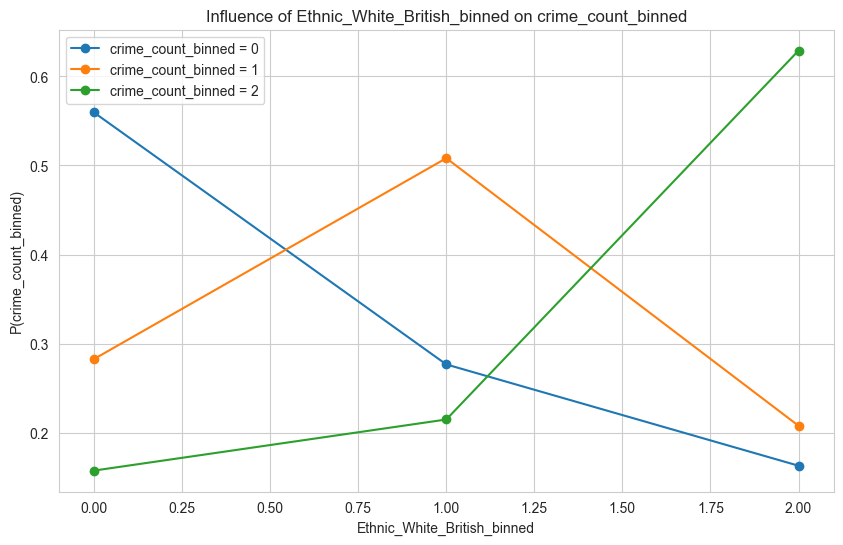

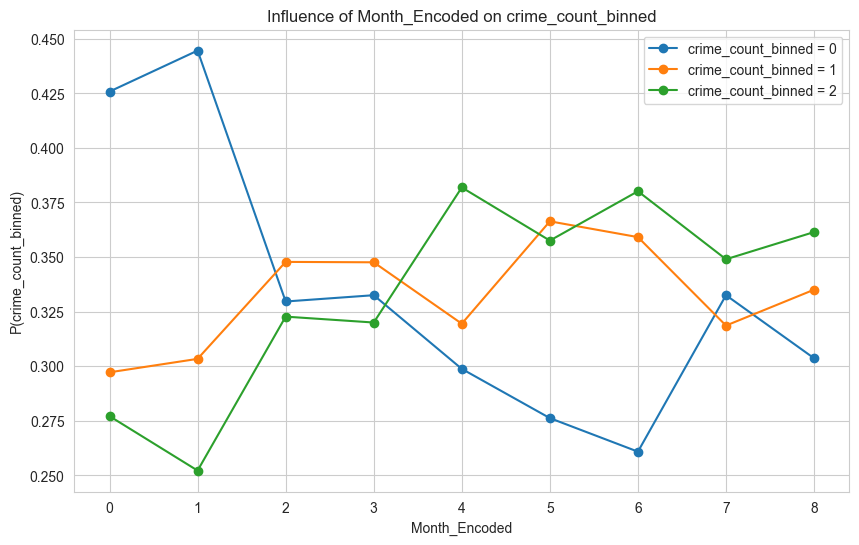

In [20]:
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination

def plot_variable_influence(model, data, target_variable='crime_count_binned', variables_to_plot=None):
    """
    Plots the influence of different variables on the target variable's (crime_count_binned) probability distribution.
    
    :param model: The fitted Bayesian network model.
    :param data: The DataFrame used to fit the model.
    :param target_variable: The target variable to analyze (default is 'crime_count_binned').
    :param variables_to_plot: A list of variables for which to plot influence on the target variable.
    """
    if variables_to_plot is None:
        variables_to_plot = data.columns.tolist()
        variables_to_plot.remove(target_variable)

    # Initialize inference object
    inference = VariableElimination(model)

    for var in variables_to_plot:
        # Get unique values of the variable to plot
        unique_vals = sorted(data[var].unique())
        probabilities = {bin_label: [] for bin_label in data[target_variable].cat.categories}

        for val in unique_vals:
            # Query the model for the probability distribution of the target variable given the current variable's value
            query_result = inference.query(variables=[target_variable], evidence={var: val})
            for bin_label in probabilities:
                probabilities[bin_label].append(query_result.values[bin_label])

        # Plot the results
        plt.figure(figsize=(10, 6))
        for bin_label, prob_values in probabilities.items():
            plt.plot(unique_vals, prob_values, marker='o', label=f'{target_variable} = {bin_label}')

        plt.title(f'Influence of {var} on {target_variable}')
        plt.xlabel(var)
        plt.ylabel(f'P({target_variable})')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage:
# Assuming 'model' is your Bayesian network model and 'bayesian_data' is your dataset
plot_variable_influence(model, bayesian_data, target_variable='crime_count_binned',
                        variables_to_plot=[ 'Economy_Not_Employed_binned',
                                            'Education_Level_3_binned', 'Migrant_Same_Address_binned',
                                            'Employment_Worked_12M_binned', 'Ethnic_White_British_binned','Month_Encoded'])
